## Name and ID

Yunke Zhu
1330327

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](https://piazza.com/class/k0grsypt15j73g).

#### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [2]:
# Load data
x_tr_N2 = np.loadtxt('./data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('./data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('./data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('./data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [29]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list

n_runs = 16
mlp_relu_results = []
start_time_sec = time.time()
lossCurve_LBFGS_RELU = []
for i in range(n_runs):
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    lossCurve_LBFGS_RELU.append(mlp_lbfgs.loss_curve_)
    mlp_relu_results.append(mlp_lbfgs)


finished LBFGS run  1/16 after    0.0 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  2/16 after    0.1 sec |  30 iters | converged    | loss 0.477
finished LBFGS run  3/16 after    0.1 sec |  21 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.1 sec |  35 iters | converged    | loss 0.347
finished LBFGS run  5/16 after    0.1 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  6/16 after    0.1 sec |  29 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.1 sec |  23 iters | converged    | loss 0.000
finished LBFGS run  8/16 after    0.1 sec |  37 iters | converged    | loss 0.347
finished LBFGS run  9/16 after    0.2 sec |  15 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    0.2 sec |  26 iters | converged    | loss 0.000
finished LBFGS run 11/16 after    0.2 sec |  36 iters | converged    | loss 0.347
finished LBFGS run 12/16 after    0.2 sec |  27 iters | converged    | loss 0.477
finished LBFGS r

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

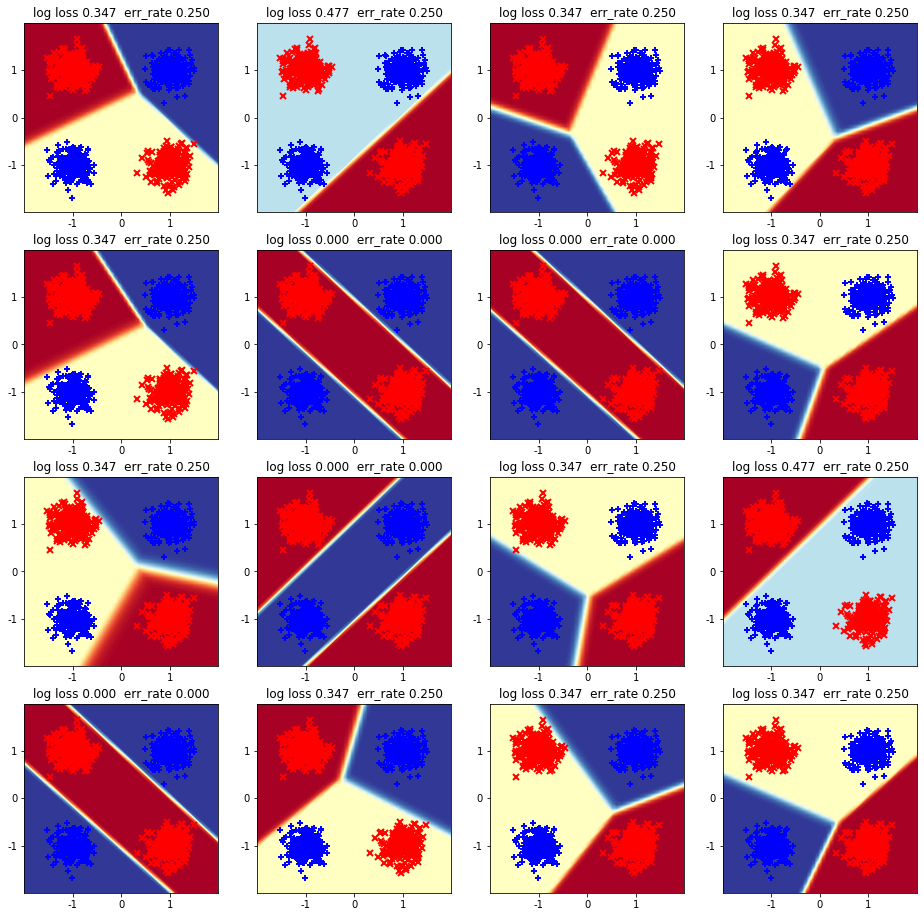

In [4]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
grid_n_runs = [_ for _ in range(n_runs)]
grid_n_runs = np.array(grid_n_runs).reshape(4,4)
for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(mlp_relu_results[grid_n_runs[i][j]], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: There are four prediction reach 0 training error, which is a fraction of $\frac{4}{16}$ meaning that 25% runs can predict absolutely right without any errors. Others runs error rate are about 25%, which means that we can predict 75% training data in these runs correctly. RELU+L-BFGS is rapidly converged. The longgest iteration taken is under 37 iterations, the average times of iteration taken is 29.

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [31]:
n_runs = 16
mlp_logistic_results = []
start_time_sec = time.time()
lossCurve_LBFGS_LOGISTIC = []
for i in range(n_runs):
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    lossCurve_LBFGS_LOGISTIC.append(mlp_lbfgs.loss_curve_)
    mlp_logistic_results.append(mlp_lbfgs)

finished LBFGS run  1/16 after    0.0 sec |  58 iters | converged    | loss 0.000
finished LBFGS run  2/16 after    0.1 sec | 125 iters | converged    | loss 0.347
finished LBFGS run  3/16 after    0.1 sec |  45 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.1 sec |  76 iters | converged    | loss 0.000
finished LBFGS run  5/16 after    0.2 sec |  40 iters | converged    | loss 0.477
finished LBFGS run  6/16 after    0.2 sec |  42 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.2 sec |  50 iters | converged    | loss 0.000
finished LBFGS run  8/16 after    0.2 sec |  14 iters | converged    | loss 0.537
finished LBFGS run  9/16 after    0.2 sec |  91 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    0.3 sec | 100 iters | converged    | loss 0.347
finished LBFGS run 11/16 after    0.3 sec |  65 iters | converged    | loss 0.347
finished LBFGS run 12/16 after    0.3 sec | 104 iters | converged    | loss 0.347
finished LBFGS r

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

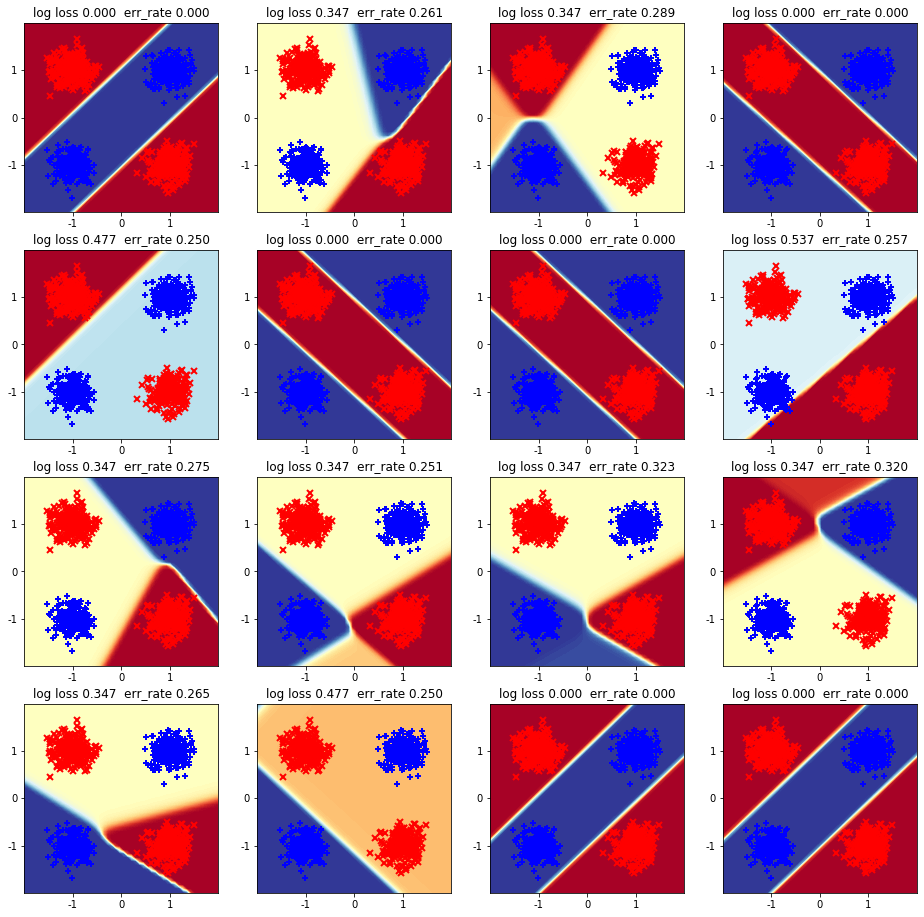

In [7]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
grid_n_runs = [_ for _ in range(n_runs)]
grid_n_runs = np.array(grid_n_runs).reshape(4,4)
for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(mlp_logistic_results[grid_n_runs[i][j]], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 37.5% ($\frac{6}{16}$) of the runs reach 0 training error. As for Other runs the error rate is between 0.32 to 0.25. For most cases, these models has an error rate about 25%(a little more than 25%). This model takes more time to converge compared to RELU, the iterations taken is 14 and 125, and average iterations taken is about 63 which is more than slower than RELU model using the same L-BFGS solver. 

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [32]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 

mlp_relu_sgd_results = []
start_time_sec = time.time()
lossCurve_SGD_RELU = []
for i in range(n_runs):
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    lossCurve_SGD_RELU.append(mlp_sgd.loss_curve_)
    mlp_relu_sgd_results.append(mlp_sgd)

finished SGD run  1/16 after    4.8 sec | 267 epochs | converged     | loss 0.347
finished SGD run  2/16 after   10.2 sec | 307 epochs | converged     | loss 0.478
finished SGD run  3/16 after   14.6 sec | 239 epochs | converged     | loss 0.347
finished SGD run  4/16 after   21.7 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  5/16 after   26.6 sec | 275 epochs | converged     | loss 0.347
finished SGD run  6/16 after   33.6 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after   40.7 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  8/16 after   45.5 sec | 273 epochs | converged     | loss 0.347
finished SGD run  9/16 after   49.5 sec | 219 epochs | converged     | loss 0.347
finished SGD run 10/16 after   56.7 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run 11/16 after   63.9 sec | 394 epochs | converged     | loss 0.478
finished SGD run 12/16 after   70.9 sec | 400 epochs | NOT converged | loss 0.478
finished SGD run

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

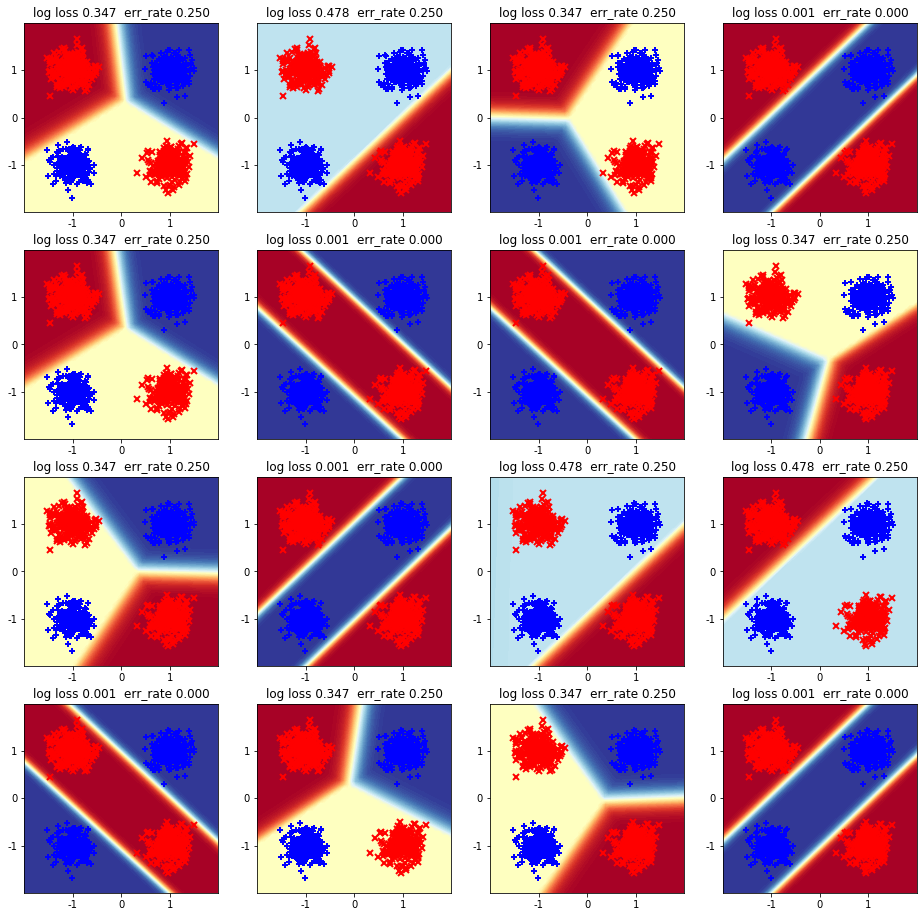

In [9]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
grid_n_runs = [_ for _ in range(n_runs)]
grid_n_runs = np.array(grid_n_runs).reshape(4,4)
for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(mlp_relu_sgd_results[grid_n_runs[i][j]], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 37.5% ($\frac{6}{16}$) of the runs reach 0 training error. As for Other runs the error rate is all 0.25.This model takes much more time to converge compared to L-BFGS using the same activation function, there are 7 models that are not even converged after 400 iterations. And the time consuming is more than L-BFGS models since this model needs more time for converge.

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**: Compared with L-BFGS in part1, SGD has more predictions with 0 training errors(37.5% and 25%). And SDG solver takes more time running 16 models with the same size of data. And this is also the reason that SGD appears some NOT Converged runs. \
The main reason causing the difference is that SGD takes more time to converge the models. The root reason is SGD take the advantage of first derivative and L-BFGS takes both first derivative and second derivative. This helps L-BFGS converge more rapidly. The advantage of L-BFGS is that it can optimize the model by rapidly converge using it's featrue of second derivative, which SGD doesn't have.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [34]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 

mlp_logistic_sgd_results = []
start_time_sec = time.time()
lossCurve_SGD_LOGISTIC = []
for i in range(n_runs):
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    lossCurve_SGD_LOGISTIC.append(mlp_sgd.loss_curve_)
    mlp_logistic_sgd_results.append(mlp_sgd)

finished SGD run  1/16 after    2.3 sec | 161 epochs | converged     | loss 0.693
finished SGD run  2/16 after    7.7 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  3/16 after   13.2 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  4/16 after   16.1 sec | 215 epochs | converged     | loss 0.693
finished SGD run  5/16 after   21.5 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  6/16 after   27.0 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  7/16 after   33.2 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  8/16 after   39.1 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  9/16 after   44.8 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 10/16 after   50.2 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 11/16 after   52.0 sec | 124 epochs | converged     | loss 0.693
finished SGD run 12/16 after   57.4 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

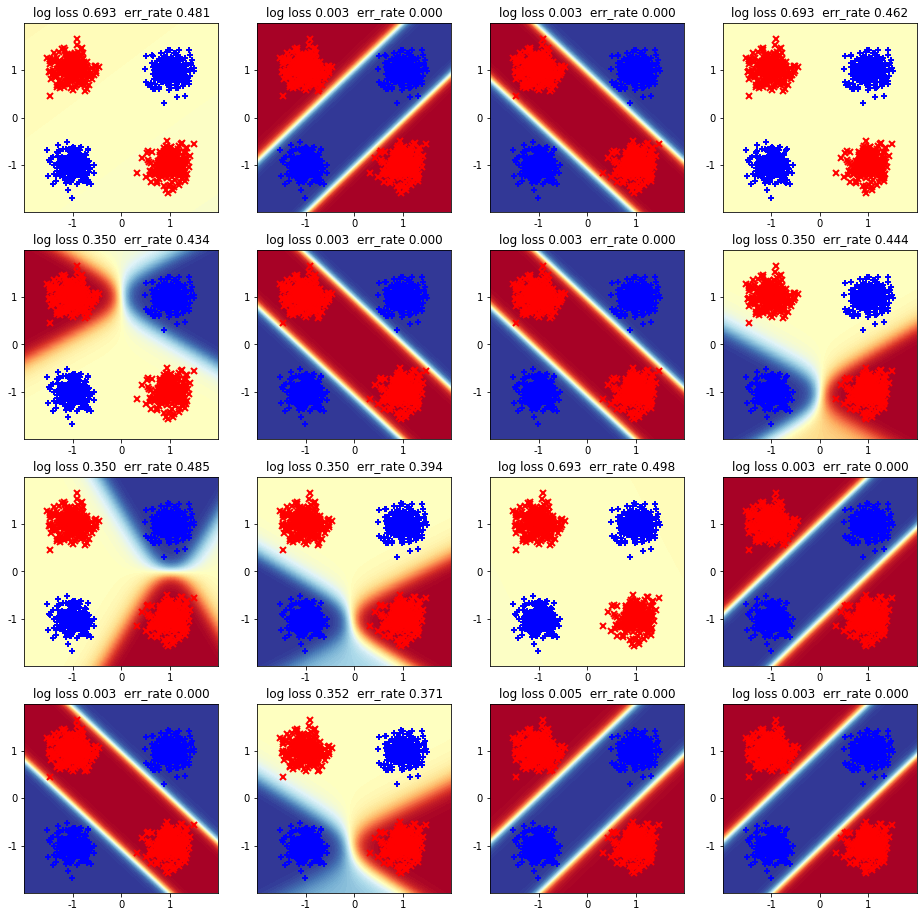

In [11]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
grid_n_runs = [_ for _ in range(n_runs)]
grid_n_runs = np.array(grid_n_runs).reshape(4,4)
for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(mlp_logistic_sgd_results[grid_n_runs[i][j]], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 50%($\frac{8}{16}$) As for Other runs the error rate is between 0.498 and 0.371, which means that for those models exists training error, there is at least 37% error rate. This model takes much more time to converge compared to L-BFGS using the same activation function(logistic sigmoid), there are only two runs that are converged. And for the rest runs, they are not converged after 400 iterations. And the time consuming is more than L-BFGS models since this model needs more time for converge.

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: Compared with L-BFGS slover using the same logistic sigmoid activation function, this model contains much more cases with 0 trainig errors. But this case is similar as the last one but much more time consuming , and the main difference is that solver SGD is not good at converge. Like mentioned before, SGD normally use first derivative while L-BFGS use both first and second derivative that helps it converge rapidly. 

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

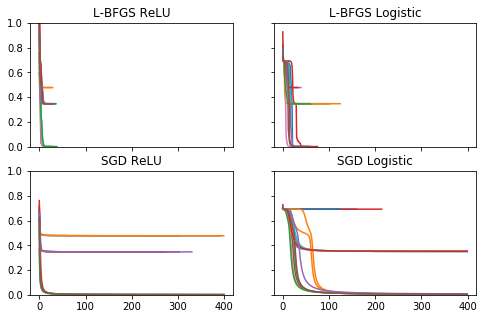

In [35]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

for l in lossCurve_LBFGS_RELU:
    ax_grid[0][0].plot(l)

for l in lossCurve_LBFGS_LOGISTIC:
    ax_grid[0][1].plot(l)
for l in lossCurve_SGD_RELU:
    ax_grid[1][0].plot(l)
for l in lossCurve_SGD_LOGISTIC:
    ax_grid[1][1].plot(l)


# TODO plot 16 curves for each of the 2x2 settings of solver and activation
ax_grid[0,0].set_title('L-BFGS ReLU')
ax_grid[0,1].set_title('L-BFGS Logistic')

    
ax_grid[1,0].set_title('SGD ReLU')
ax_grid[1,1].set_title('SGD Logistic')
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:** RELU seems easier to optimize since the left two models' curves(loss curves) using ReLU activation function drops rapidly than using a logistic sigmoid activation function. \
And SGD with logistic sigmoid activation function needs most iterations in general because for mose loss curves in other models it needs more times of iteerations in general(the length of each curve stands for the iteration it needs).

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: I'm not convinced that using ReLU is always easiest to optimize.\
We can build several additional experimental comparisons, for example:\
1. Using several different dataset containg different number of features.
2. Using more activation functions except ReLU and Logistic Sigmoid, such like Softmax, Tanh, and compare their performance.
3. Using more appropriate solver, such as DFP, to check if ReLU only performs well under L-BFGS and SGD.